<a href="https://colab.research.google.com/github/lupantaleon/Entregas-/blob/main/SVM_Con_Regresor_KERNEL_LINEAL_y_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
'''
Uso de Máquina de Soporte Vectorial como Regresor.

DOCUMENTACIÓN OFICIAL SKLEARN
https://scikit-learn.org/stable/modules/svm.html#svm
https://scikit-learn.org/stable/modules/svm.html#svm-regression

# Receta: 
Estandarizar las caracteristicas 
Obtener la ecuacion del hiperplano, lo que equivale a encxontrar sus coeficientes 
Para cada dato que deseo clasificar reemplazar sus coordenadas en la ecuacion del hiperplano, y dependiendo del valor otenido clasificar el dato en una u otra categoria. Ej: si hay dos clases, si esta arriba es una clase, si esta abajo es otra 

'''

# cargamos las librerías que usaremos
import numpy as np #Libreria para manipular datos 
import pandas as pd #Libreria para manipular datos 
import matplotlib.pyplot as plt #Para graficar  
import seaborn as sns #Solo para levantar el dataset ahora 
import warnings #para que no molesten los warnings 
from sklearn.svm import SVR # el regresor 
from sklearn.preprocessing import StandardScaler #estandar escalar, toma un data set y lo divide linealmente, todas las caracteristticas son comparables. Facilita tambien la rapidez del SVM 
                                
##############################################################################
# class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
#                       tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
#                       cache_size=200, verbose=False, max_iter=- 1)
##############################################################################

warnings.filterwarnings('ignore')


In [6]:
# cargamos los datos en un df, directamente desde Seaborn
# nos interesa ver si podemos encontrar relaciones entre algunas variables continuas

data = sns.load_dataset('anscombe') # dataset que vamos a usar directamente desde seaborn 

In [7]:
print(data.shape) #Print para ver el dataset FORMA 
print(data.head(10)) #Print para ver el dataset CABEZA
print(data.columns) #Print para ver el dataset  COLUMNAS
print(data.tail()) #Print para ver el dataset  COLA 

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [8]:
data.info() #Metodo de panda para ver como esta echo nuestro dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


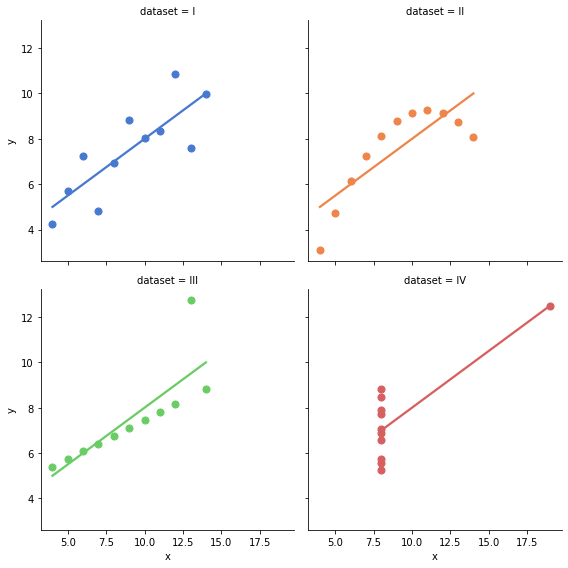

In [9]:
# Para ver lop que tiene el data set por dentro, lo grafico 
sns.lmplot( #Metodo de seaborn para graficar el dataset 
    data=data, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [12]:
# separamos el dataset II y la colocamos en una variable  

data2=data[data['dataset']=='II']
data2 #No hace falta poner sprint porque en Colab no es necesario 

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


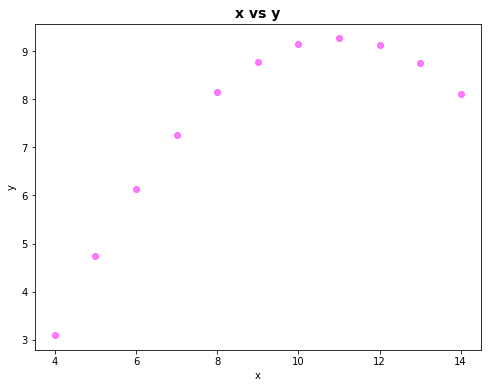

In [14]:
# graficaremos los valores del dataset que elegimos, el dataset II 

fig=plt.figure(figsize=(8,6))
plt.scatter(data2['x'],data2['y'],color="magenta", alpha=0.5)
plt.title("x vs y",fontsize=14,fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()


In [16]:
# Definimos las variables predictoras e independiente
y=data2.pop('y') #recortamos de data 2 la viarable y
y

11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [26]:
# estadarizamos caacterísticas, debemos entrenarse con las variables que vamos a usar 
x_train=data2['x'].to_frame() #si le ponemos data2 x lo va a interpretar como una serie/columna de pandas , al ponerle data2 frame entiende como un dataframe 
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x_train)
y = sc_y.fit_transform(y.reshape(-1, 1)) #- X e Y tienen que tener el mismo tamaño en este caso 11,1 
print(x.shape)
print(y.shape)
x #Si vez a x mas arriba era algo, pero ahora X es muy distinta 

(11, 1)
(11, 1)


array([[ 0.31622777],
       [-0.31622777],
       [ 1.26491106],
       [ 0.        ],
       [ 0.63245553],
       [ 1.58113883],
       [-0.9486833 ],
       [-1.58113883],
       [ 0.9486833 ],
       [-0.63245553],
       [-1.26491106]])

In [27]:
# Ahora ponemos a trabajar a la maquinita...
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos
# instanciamos modelo LINEAL

sv = SVR(kernel= 'linear')

# entrenamos...
sv.fit(x, y)

'''
class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, 
C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
class sklearn.svm.linearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', 
fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)
'''

"\nclass sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, \nC=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)\nclass sklearn.svm.linearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', \nfit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)\n"

In [28]:
# VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR sobre x_otro ESTOS SON PUNTOS NUEVOS QUE EL MODELO NO VIO CUANDO FUE ENTRENADO, lo uso para ver como responde mi modelo, para que lado va  
x_otro=pd.DataFrame([[4.5],[6.5],[8.5],[10.5],[12.5]])
xt = sc_x.transform(x_otro)
y_pred=sv.predict(xt).reshape(-1,1) #el reshape funciona para hacer que los datos tengan el mismo formato, si no tienen el mismo formato no se los puede comparar 
#y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
print(xt)
print(y_pred)

[[-1.42302495]
 [-0.79056942]
 [-0.15811388]
 [ 0.47434165]
 [ 1.10679718]]
[[-0.99488392]
 [-0.47865061]
 [ 0.0375827 ]
 [ 0.55381601]
 [ 1.07004931]]


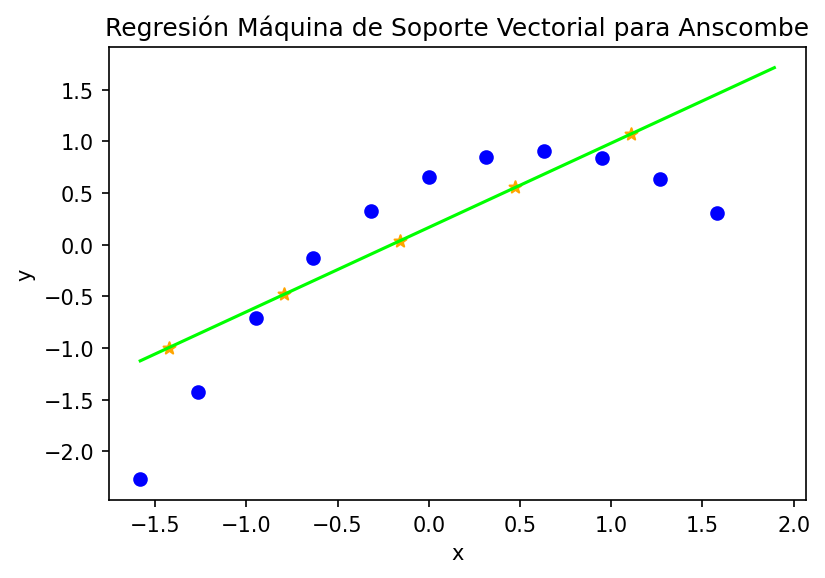

In [30]:
x_vect = np.arange(4., 15., 0.01) # es un vector numpy, NO pandas
x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col
xg=sc_x.transform(x_graf)
#x_graf = xg.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col


# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(x, y, c = 'blue')     # grafica los datos
plt.plot(xg, sv.predict(xg), color = 'lime') # id predicción
plt.scatter(xt, y_pred, color='orange', marker='*')
plt.plot()
plt.title(f'Regresión Máquina de Soporte Vectorial para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura


### EL GRAFICO DEMUESTRA EL KERNEL LINEAL **NO FUNCIONA ** por lo que tenemos que elegir otro 

In [31]:
# preguntamos qué tal predice sobre los datos ingresados
print('\n')
print(f'Precisión: {sv.score(x, y)}')
print('\n')




Precisión: 0.6384728024535903




#### LA PRECISION ES MALA, POR LO QUE OPTAMOS POR EL RBF
 ###  KERNEL RBF 





In [33]:
# A eso se refiere con problema linealmente separable :)
# probemos otro kernel
sv1 = SVR(kernel= 'rbf', gamma=0.7)

# entrenamos CON LOS MISMOS PARAMETROS
sv1.fit(x, y)

SVR(gamma=0.7)

In [34]:
y_pred1=sv1.predict(xt).reshape(-1,1)

print(y_pred1)

[[-1.45717452]
 [-0.52899651]
 [ 0.4279529 ]
 [ 0.8007877 ]
 [ 0.67167241]]


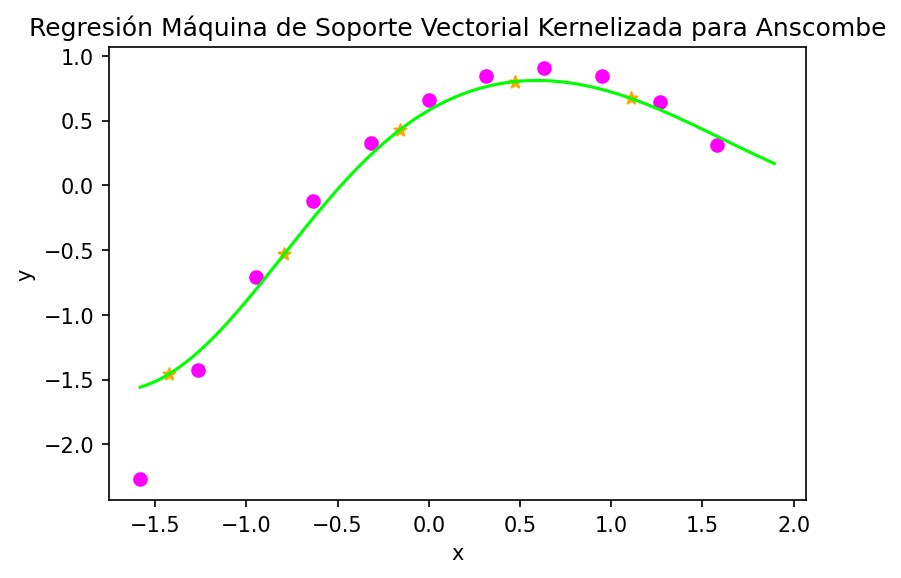

In [ ]:

# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(x, y, c = 'magenta')     # grafica los datos
plt.plot(xg, sv1.predict(xg), color = 'lime') # id predicción
plt.scatter(xt, y_pred1, color='orange', marker='*')
plt.plot()
plt.title(f'Regresión Máquina de Soporte Vectorial Kernelizada para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura


In [35]:
print(f'Precisión: {sv1.score(x, y)}')


Precisión: 0.9452602767211021


LA PRESICIÓN ES MUCHO MEJOR. 